In [1]:
#SETUP always run this
import math
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "finviz.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print(len(tickers))



3157


In [2]:
#Optional - RUN THIS ONCE A DAY TO GET THE LATEST DATA. Takes a while to run.
def getAllData(tickers):
    anchorData = yf.download(tickers)
    anchorData.head()
    closingPrices = anchorData["Close"]
    closingPrices.to_csv("AllClosingPricesToday.csv")
    closingPrices = pd.read_csv("AllClosingPricesToday.csv")
    return closingPrices

def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]

closingPrices = getAllData(tickers)


[*********************100%***********************]  3157 of 3157 completed


In [5]:
# Read in closing prices from saved CSV file if needed
closingPrices = pd.read_csv("AllClosingPricesToday.csv")
closingPrices.tail()

def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]


In [12]:
# Run this this cell if we want to look at stocks releative to a low point. No harm in running even if not used. 
def getMinPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
        lowest = min(searchRange[ticker])

        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers


In [3]:
# Run this this cell if we want to look at stocks relative to a high point. No harm in running even if not used. 
def getMaxPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
        lowest = max(searchRange[ticker])

        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers

In [4]:
#Search Range for Greater than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMaxPrice(tickers, "2022-08-01 00:00:00-05:00", "2022-08-30 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))


3139
['ACAQ', 'AGNCL', 'AMPX', 'AMV', 'APE', 'BHVN', 'CRBG', 'FG', 'GBTG', 'GEHC', 'GEHCV', 'MBC', 'MSBIP', 'PRME', 'RBT', 'RXO', 'SVIIU', 'XPER'] 18


In [ ]:
#Search Range for Less than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMaxPrice(tickers, "2022-05-01 00:00:00-05:00", "2022-07-15 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))

In [5]:
# Just needs to be run once to ensure the cell is active. 
def counter(date):
    count = 0.0
    searchFor = []
    antiSearch = []
    total = len(todaysTickers)
    for ticker in todaysTickers:
        if math.isnan(date[ticker]):
            total -=1
        elif date[ticker] > validTickers[ticker]:
            count += 1
            searchFor.append(ticker)
        else:
            antiSearch.append(ticker)

    percent = round(count/total, 4)
    return [percent, searchFor]

In [6]:
# date range to create graph on
targetRange = getSearchRange("2022-09-01 00:00:00-05:00", "2023-02-22 00:00:00-05:00")

# Number of days in the target range
print(targetRange.shape[0])

targetRange.tail()

118


,Date,A,AA,AAC,AADI,AAL,AAN,AAON,AAP,AAPL,...,ZM,ZNTL,ZS,ZT,ZTR,ZTS,ZUMZ,ZUO,ZWS,ZYXI
15386,2023-02-15 00:00:00-05:00,151.750000,48.410000,10.20,11.87,16.799999,15.07,78.959999,151.289993,155.330002,...,80.769997,20.370001,142.770004,10.050,6.76,175.020004,25.530001,9.19,24.379999,12.97
15387,2023-02-16 00:00:00-05:00,148.279999,48.770000,10.22,11.70,16.389999,14.87,78.680000,150.190002,153.710007,...,77.910004,19.469999,132.929993,10.095,6.74,173.929993,25.219999,9.07,23.530001,12.89
15388,2023-02-17 00:00:00-05:00,148.259995,46.889999,10.21,11.76,16.360001,14.75,80.000000,149.990005,152.550003,...,76.110001,19.770000,132.350006,10.095,6.77,172.029999,25.309999,8.90,23.360001,13.05
15389,2023-02-21 00:00:00-05:00,143.419998,48.070000,10.23,11.55,15.690000,13.85,77.570000,144.190002,148.479996,...,72.470001,18.549999,127.839996,10.050,6.58,169.839996,24.090000,8.62,22.750000,12.61
15390,2023-02-22 00:00:00-05:00,142.080002,48.980000,10.22,11.38,15.560000,14.14,78.029999,143.619995,148.910004,...,73.389999,19.490000,132.160004,10.060,6.51,166.429993,24.320000,8.70,22.959999,12.54


[0.0198, 0.0239, 0.0427, 0.0535, 0.0682, 0.0911, 0.0577, 0.0771, 0.064, 0.0529, 0.0621, 0.0551, 0.0465, 0.0436, 0.0382, 0.0373, 0.0395, 0.0465, 0.0421, 0.0427, 0.0487, 0.0755, 0.0768, 0.0851, 0.0733, 0.0688, 0.0691, 0.0701, 0.093, 0.0787, 0.0959, 0.107, 0.1074, 0.1004, 0.1265, 0.1373, 0.1618, 0.166, 0.1768, 0.2163, 0.2189, 0.224, 0.1864, 0.1924, 0.2163, 0.23, 0.2322, 0.1972, 0.2727, 0.2762, 0.2596, 0.28, 0.2603, 0.2539, 0.2682, 0.267, 0.2928, 0.2889, 0.2969, 0.2686, 0.2784, 0.3183, 0.3163, 0.3234, 0.2749, 0.2631, 0.2596, 0.2673, 0.2539, 0.273, 0.2867, 0.2721, 0.2335, 0.2208, 0.2106, 0.2227, 0.2443, 0.2249, 0.2342, 0.2345, 0.2141, 0.2402, 0.2332, 0.2278, 0.2406, 0.2339, 0.2712, 0.2668, 0.2853, 0.3009, 0.3151, 0.3281, 0.3183, 0.2904, 0.2722, 0.3022, 0.319, 0.3185, 0.3244, 0.342, 0.3437, 0.3212, 0.3615, 0.3817, 0.4113, 0.3988, 0.3762, 0.3897, 0.3701, 0.3519, 0.3514, 0.3728, 0.3657, 0.3779, 0.3645, 0.3674, 0.3219, 0.3244] 118


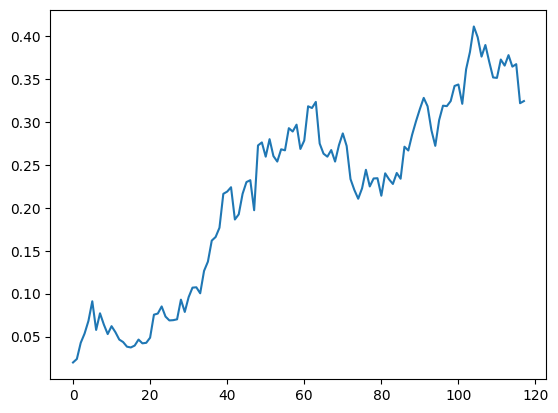

In [7]:
percents = []
for i in range(targetRange.shape[0]):
    percents.append(counter(targetRange.iloc[i])[0])
print(percents, len(percents))

#plot 
ys = percents
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()
plt.close()